# 6.1 텍스트 데이터 다루기

### 텍스트 데이터

- **텍스트는 단어의 시퀀스나 문자의 시퀀스**로 이해할 수 있으며 가장 흔한 시퀀스 형태의 
데이터임


- 텍스트 데이터를 신경망에 주입시키기 위해서는 다음의 2가지 단계를 거쳐야 함
    1. 토큰화
    2. 벡터화


### 토큰화와 벡터화

#### 토큰화(tokenization)

- 텍스트를 나누는 단위(단어, 문자, n-그램)를 **토큰(token)**이라 함
- **텍스트를 토큰으로 나누는 작업을 토큰화(tokenization)**라고 함

#### 벡터화(vectorization)

- **벡터화(vectorization)는 토큰화를 거친 토큰들을 벡터로 변환해 주는 작업**을 말함

- 여기서 말하는 벡터화는 텍스트 데이터를 다루는 경우를 말하며, 일반적인 의미의 벡터화는 데이터를 수치형 텐서로 바꿔주는 작업을 뜻함

#### 텍스트 벡터화의 여러가지 방식들
- 텍스트를 **단어**로 나누고 각 단어를 하나의 벡터로
- 텍스트를 **문자**로 나누고 각 문자를 하나의 벡터로
- 텍스트에서 단어나 문자의 **n-그램(n-gram)**을 추출해 각 n-그램을 하나의 벡터로

위의 과정 모두 토큰화를 거쳐 벡터화가 되는 것을 알 수 있음

#### 참고) n-그램과 BoW

- **n-그램은 문장에서 추출한 N개의 연속된 단어 그룹**을 말함


- 이러한 n-그램 집합은 리스트나 시퀀스가 아니라 단순히 **토큰의 집합**이며 순서가 없다는 특징이 있으며 이러한 종류의 토큰화 방법을 **Bow(Bag-of-Words)**라고 함


- **BoW는 순서가 없는 토큰화 방법이기 때문에 n-그램을 추출하는 것은 일종의 특성 공학**임
    
- 따라서 머신러닝(얕은학습)의 텍스트 처리 모델에서는 유용한 특성공학 방법이지만 **딥러닝에서는 순환신경망과 1D컨브넷으로 이러한 특성 공학을 대체**함


### 토큰과 벡터의 연결

여기서는 토큰과 벡터를 연결하는 방식 중 주요한 2가지 방법을 소개함

**1. 원-핫 인코딩(one-hot encoding)**  

**2. 토큰 임베딩(token embedding)**(일반적으로 단어에 대해서만 사용되므로 **단어 임베딩(word embedding)**이라고도 부름)

## 6.1.1 단어와 문자의 원-핫 인코딩

### 원-핫 인코딩

- 원-핫 인코딩(one-hot encoding)은 토큰을 벡터로 변환하는 가장 일반적이고 기본적인 방법

- 모든 단어에 고유한 정수 인덱스 i를 부여하고 이 정수 인덱스i를 크기가 N(단어 사전의 크기)인 이진 벡터로 변환

### 단어, 문자 수준의 one-hot encoding 구현 예

In [1]:
# 단어 수준의 one-hot encoding의 간단한 그현 예

import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework']

token_index = {}

# 단어 사전 생성 (index 0은 사용 X)
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index)+1

# 한 문장에 총 10개의 단어만 제한
max_length = 10

result = np.zeros((len(samples), max_length, max(token_index.values())+1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
#         index = token_index.get(word)
#         result[i, j, index] = 1.
        result[i, j, token_index[word]] = 1.

In [2]:
# 문자 수준 one-hot encoding의 간단한 구현 예

import string

samples = ['The cat sat on the mat.', 'The dog ate my homework']

# 출력할 수 있는 모든 아스키 문자들로 된 문자사전 생성
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters)+1)))

# 문장당 최대 문자 50자
max_length = 50

result = np.zeros((len(samples), max_length, max(token_index.values())+1))

for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
#         index = token_index.get(character)
#         result[i, j, index] = 1.
        result[i, j, token_index[character]] = 1.

### 케라스 유틸리티 사용 one-hot encoding

#### `Tokenizer` 클래스

- 케라스의 `Tokenizer`클래스를 사용하면 단어 수준의 one-hot encoding을 할 수 있음


- 객체 생성 시 `num_words` 매개변수로 단어 수 제한(가장 높은 빈도의 단어만 제한된 수 내에서 선택)


- `texts_to_matrix()`
    - `texts_to_matrix()`는 아래의 두 메서드를 차례대로 호출
    - 텍스트를 시퀀스 리스트로 바꾸어주는 `texts_to_sequences()`
    - 시퀀스 리스트를 넘파이 배열로 바꾸어주는 `sequences_to_matrix()`
    

- `texts_to_matrix()`의 `mode` 매개변수는 binary 말고도 count, freq, tfidf 등이 있음
    - binary 지정시 이진 벡터 표현을 얻을 수 있음

In [3]:
# 케라스를 사용한 단어 수준의 one-hot encoding

from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework']

# 가장 빈도가 높은 1000개의 단어만 선택하도록 Tokenizer 객체를 생성
tokenizer = Tokenizer(num_words=1000)

# 샘플 데이터를 바탕으로 단어 인덱스를 생성
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print(word_index)

Using TensorFlow backend.


{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


### 원-핫 해싱(one-hot hashing)

- 원-핫 인코딩의 변종으로 어휘사전의 토큰 수가 너무 커서 다루기 어려울 때 사용
- 단어를 해싱해 고정된 크기의 벡터로 변환하는 방식


- 메모리를 아낄 수 있으며 온라인 방식으로 데이터를 인코딩 할 수 있는 장점이 있음
- 해시 충돌(hash collision)이 일어날 수 있다는 단점이 있음(다른 단어가 같은 해시를 만드는 경우)

In [4]:
# 단어 수준 one-hot hashing의 간단한 구현 예

samples = ['The cat sat on the mat.', 'The dog ate my homework']

# 단어를 크기가 1000인 벡터로 저장
# 1000개 이상의 단어가 있으며 해시 충돌 일어날 수 있음
dimensionality = 1000

max_length = 10

result = np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        result[i, j, index] = 1.

## 6.1.2 단어 임베딩 사용하기

### 단어 임베딩(word embedding)

- **단어 임베딩(word embedding)**은 밀집 **단어 벡터(word vector)**를 사용하는 것을 말함
- 단어 임베딩은 일반적으로 단어 출현 통계를 사용하여 계산됨

#### 원-핫 인코딩과의 비교
##### one-hot encoding
- 대부분 0으로 채워져있으므로 희소(sparse)하고 고차원
- 수동으로 인코딩됨

##### word embedding
- 밀집(dense)하고 저차원
- 데이터로부터 학습됨

#### 단어 임베딩을 만드는 방법
1. 직접 훈련 데이터로 단어 임베딩을 학습하기
2. 사전 훈련된 단어 임베딩(pretrained word embedding)을 사용하기

### 1. 직접 훈련 데이터로 단어 임베딩 학습하기

#### 단어 임베딩 학습

- 단어와 밀집 벡터를 연관짓기 위해 랜덤하게 벡터를 선택하는 것은 문제가 있음
    - 임베딩 공간이 구조적이지 않음
    - 비슷한 의미이지만 완전히 다른 임베딩을 가질 수 있음
    
    
- **단어 간의 의미 관계를 반영하기 위해 단어 벡터(단어 임베딩)를 기하학적 공간에 매핑하여야 함**
    - 유사한 의미의 단어 벡터 간의 거리(L2 거리)를 고려
    - 유사한 의미의 단어 벡터 간의 방향을 고려
    - 예) 'king'벡터 + 'female'벡터 = 'queen'벡터
    
    
- **임베딩 공간을 만드는 것은 단어 간의 의미 관계의 중요성을 반영한다는 의미가 있음**
    - 임베딩 공간은 문제에 따라서 크게 달라짐
    - 새로운 작업에는 새로운 임베딩을 학습하여야 함


#### 케라스의 `Embedding`층

- `Embedding`층은 특정 단어를 나타내는 정수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해할 수 있음
    - 정수 인덱스를 입력으로 받아 연관된 벡터를 찾아 반환


- 입력은 크기가 `(samples, sequence_length)`인 2D 정수형 텐서
    - 각 샘플은 정수의 시퀀스
    - 가변 길이의 시퀀스를 임베딩 할 수 있음
        - `sequence_length`보다 작은 길이의 시퀀스는 0으로 padding
        - `sequence_length`보다 큰 길이의 시퀀스는 잘림


- 출력은 크기가 `(samples, sequence_length, embedding_dimensionality)`인 3D 실수형 텐서
    - 이 3D 텐서는 RNN층이나 1D합성곱 층에서 처리됨(이 과정이 단어 사이의 관계나 문장 구조를 고려하는 과정)

In [5]:
# IMDB 영화 리뷰 감성 예측문제에 Embedding 층 적용
# 여기서는 단어 간의 의미 관계를 고려하지 않음

from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 텍스트 길이
maxlen = 20

# 정수 인덱스 리스트로 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 정수 인덱스 리스트를 (samples, maxlen)크기의 2D 정수 텐서로 변환
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print(x_train.shape, x_test.shape)

(25000,) (25000,)
(25000,) (25000,)
(25000, 20) (25000, 20)


`pad_sequences()`의 `padding`매개변수
- `pre`(기본값)지정 시 시퀀스 왼쪽에 패딩이 추가됨
- `post` 지정 시 오른쪽에 패딩이 추가됨

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

embedding_dim = 8

model = Sequential()

# max_features(10000)개의 단어만 feature로 학습
# 각 문장(sequence) 길이는 maxlen개의 단어로 제한
# 각 단어에 상응하는 임베딩 벡터의 차원은 8차원으로 설정
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])


history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

/home/young/anaconda3/envs/tf_2.0/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.6681 - acc: 0.6266 - val_loss: 0.6172 - val_acc: 0.7002
Epoch 2/10
20000/20000 [==============================] - 1s 53us/step - loss: 0.5412 - acc: 0.7531 - val_loss: 0.5246 - val_acc: 0.7324
Epoch 3/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.4615 - acc: 0.7892 - val_loss: 0.4990 - val_acc: 0.7474
Epoch 4/10
20000/20000 [==============================] - 1s 52us/step - loss: 0.4219 - acc: 0.8087 - val_loss: 0.4931 - val_acc: 0.7500
Epoch 5/10
20000/20000 [==============================] - 1s 52us/step - loss: 0.3945 - acc: 0.8242 - val_loss: 0.4935 - val_acc: 0.7534
Epoch 6/10
20000/20000 [==============================] - 1s 52us/step - loss: 0.3716 - acc: 0.8367 - val_loss: 0.4969 - val_acc: 0.7528
Epoch 7/10
20000/20000 [==============================] - 1s 52us/step - loss: 0.3507 - acc: 0.8504 - val_loss: 0.5015 - val_acc:

In [8]:
result = model.evaluate(x_test, y_test)

print("loss: {}\nacc: {}".format(result[0], result[1]))

25000/25000 [==============================] - 1s 23us/step
loss: 0.5169788101673126
acc: 0.7537599802017212


#### 결과 분석

- 약 75%의 정확도를 보임
- 임베딩 시퀀스를 펼치고 하나의 Dense층을 훈련하였으므로 각 단어를 독립적으로 다루었고 **단어 사이의 관계나 문장 구조를 고려하지 않았음**
- 시퀀스 전체를 고려하도록 임베딩 층 위에 RNN이나 Conv1D 층을 추가하는 것이 좋음

### 2. 사전 훈련된 단어 임베딩(pretrained word embedding)을 사용하기

#### 사전 훈련된 단어 임베딩
- **훈련 데이터는 부족하고 일반적인 특성이 필요할 때 유용함**
- **만약 훈련데이터가 많으면 특정 문제에 특화된 임베딩이 훨씬 성능이 좋음**
- 미리 훈련된 임베딩 공간은 **언어 구조의 일반적인 측면을 잡아냄**
    - 이미지 분류에서 사용한 pretrained convnet과 동일한 역할


- 인기있는 유명한 단어 임베딩들
    - Word2vec
    - GloVe
    
    
- 여기서는 GloVe 단어 임베딩을 사용하지만 다른 단어 임베딩들도 사용법은 같음

## 6.1.3 모든 내용을 적용하기: 원본 텍스트에서 단어 임베딩까지

- IMDB 원본 텍스트 데이터를 내려받아 문장들을 벡터의 시퀀스로 임베딩하고 펼친 후 Dense층을 훈련하는 것 까지 모두 구현

- pretrained word embedding(GloVe) 사용

In [9]:
# IMDB 데이터셋에서 데이터 읽기
# 문자열 데이터는 texts에 긍정/부정 레이블은 labels에 저장

import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [10]:
# 문자열 데이터 토큰화

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 단어로 제한

# pretrained embedding의 사용이 좋은 성능을 내는 
# 훈련데이터가 부족한 예제를 위해 훈련 데이터는 200개만 사용함
training_samples = 200
validation_samples = 10000

# 빈도 높은 10000개의 단어만 사용
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

print(data.shape, labels.shape)


# 샘플이 순서대로 있어서 shuffle
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

# 훈련, 검증 세트로 분할
x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(25000, 100) (25000,)
(200, 100) (200,)
(10000, 100) (10000,)


In [11]:
# 테스트 데이터셋 준비

test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [12]:
# 사전 훈련된 임베딩 파일 데이터 parsing
# 단어와 그 단어에 해당하는 임베딩 벡터를 매핑

glove_dir = './datasets'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()

In [13]:
# Embedding layer에 주입할 수 있도록 임베딩 행렬 형태로 변환
# 이 행렬의 크기 = (max_words, embedding_dim)

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

# 행렬의 i번째 원소는 앞서 토큰화로 만든 단어 인덱스(word_index)의 i번째 단어에 
# 상응하는 embedding_dim 차원의 임베딩 벡터가 되어야 함

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # 사전 훈련된 임베딩에 없는 단어일 경우, 0이 됨            
            embedding_matrix[i] = embedding_vector

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()

# max_words(10000)개의 단어만 feature로 학습
# 각 문장(sequence) 길이는 maxlen개의 단어로 제한
# 각 단어에 상응하는 임베딩 벡터는 embedding_dim차원으로 설정
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [15]:
# GloVe에서 가져온 pretrained 단어 임베딩 가중치를 Embedding layer에 load
model.layers[0].set_weights([embedding_matrix])

# 무작위로 초기화된 다른 layer에서의 대규모 gradient update가 전달되면
# 학습된 정보를 오염시키기 때문에 Embedding 층 학습 동결
model.layers[0].trainable = False

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.8066 - acc: 0.5300 - val_loss: 0.7280 - val_acc: 0.5004
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3979 - acc: 0.8550 - val_loss: 0.8036 - val_acc: 0.5053
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2667 - acc: 0.9000 - val_loss: 0.9066 - val_acc: 0.5016
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1543 - acc: 0.9650 - val_loss: 0.9552 - val_acc: 0.5051
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0858 - acc: 0.9950 - val_loss: 1.0361 - val_acc: 0.5030
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0519 - acc: 1.0000 - val_loss: 1.1364 - val_acc: 0.5029
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0323 - acc: 1.0000 - val_loss: 1.2624 - val_acc: 0.5026
Epoch 8/10
200/200 [========

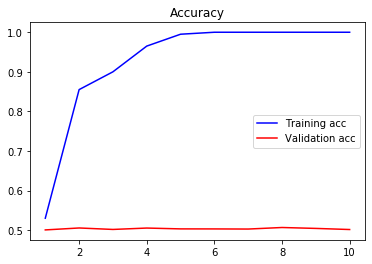

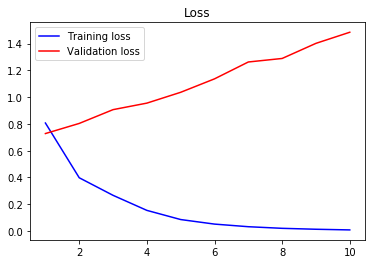

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()

In [18]:
print(model.evaluate(x_test, y_test))

25000/25000 [==============================] - 1s 33us/step
[1.4503244005584717, 0.5101199746131897]


#### 결과 분석
- 빠르게 과대적합이 일어남
- 훈련 샘플의 수가 작기 때문
- 만약 훈련 샘플의 수가 많다면 임베딩 층을 동결하지 않고 같이 학습해서 더 좋은 성능을 낼 수 있음

In [19]:
# pretrained embedding(GloVe) 사용하지 않고 훈련시켜보고 성능 비교

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()

# max_words(10000)개의 단어만 feature로 학습
# 각 문장(sequence) 길이는 maxlen개의 단어로 제한
# 각 단어에 상응하는 임베딩 벡터는 embedding_dim차원으로 설정
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

/home/young/anaconda3/envs/tf_2.0/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6897 - acc: 0.5650 - val_loss: 0.6949 - val_acc: 0.4964
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4750 - acc: 0.9750 - val_loss: 0.7263 - val_acc: 0.4984
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2724 - acc: 0.9900 - val_loss: 0.7468 - val_acc: 0.5007
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1296 - acc: 1.0000 - val_loss: 0.7602 - val_acc: 0.5002
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0639 - acc: 1.0000 - val_loss: 0.7346 - val_acc: 0.5105
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0330 - acc: 1.0000 - val_loss: 0.7768 - val_acc: 0.5076
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0184 - acc: 1.0000 - val_loss: 0.7716 - val_acc: 0.5087
Epoch 8/10
200/200 [========

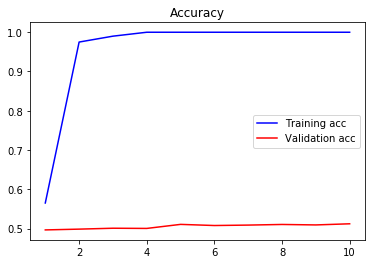

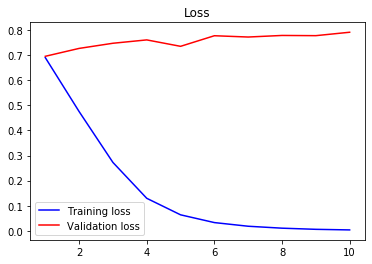

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()

In [23]:
print(model.evaluate(x_test, y_test))

25000/25000 [==============================] - 1s 34us/step
[0.7874449940872192, 0.5171999931335449]


#### 결과 분석
- 훈련 샘플의 수가 작기 때문에 앞의 pretrained embedding을 사용한 경우처럼 빠르게 과대적합이 일어났음
- 앞의 pretrained embedding을 사용한 경우와 비교해 큰 성능의 차이가 없음(책에서는 pretrained embedding을 사용한 경우가 더 성능이 좋게 나왔음)

### 6.1.4 정리

- 케라스의 Embedding 층을 사용해 토큰 임베딩을 학습시킬 수 있음
- 데이터가 부족한 자연어 처리 문제에서는 사전 훈련된 단어 임베딩을 사용해서 성능 향상을 시키자
    - 실제 테스트 결과는 큰 차이가 없었지만 일반적으로는 성능 향상이 된다고 함